# PS 88 Lecture Notebook 4: Game Theory

For this lecture notebook we will just give a quick example of how to plot expected utility graphs to figure out best responses in games.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import Table
%matplotlib inline

As a reminder, here is the payoff matrix for the "grab/defer" game you played in the survey:

|          | Grab | Defer     | 
|----------|----------|--------------|
| Grab |  0,0       |  4,1           |  
| Defer |  1,4       |  3,3           |  

As discussed in the lecture, this game has two NE. Since the best response of each player is to do the opposite of what the other does, there is one where player 1 grabs and 2 defers, and one where player 1 defers and 2 grabs. 

One way to see this visually is to plot the expected utility of grabbing as a function of the probability that the other grabs. If the other grabs with probability $p$, the expected utility to grabbing is:
$$
EU_g(p) = p \times 0 + (1-p) \times 4
$$
And the expected utility to deferring is:
$$
EU_g(p) = p \times 1 + (1-p) \times 3
$$

Let's plot both of these as a function of $p$.


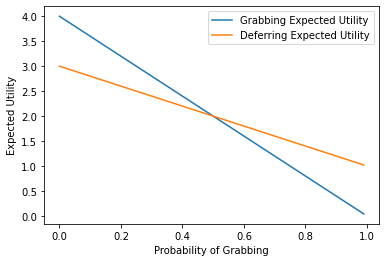

In [13]:
p = np.arange(0,1, step=.01)
eug = p*0 + (1-p)*4
eud = p*1 + (1-p)*3
plt.ticklabel_format(style='plain')
plt.plot(p,eug, label='Grabbing Expected Utility')
plt.plot(p,eud, label='Deferring Expected Utility')
plt.xlabel('Probability of Grabbing')
plt.ylabel('Expected Utility')
plt.legend()

Since the blue line is above the orange line for low values of $p$, when the other player always plays defer ($p=0$), it is better to grab. On the other hand, when the other player always grabs ($p=1$), it is better to defer. This confirms our claim about the best responses.

So far we have only   considered games between two players, and where they always pick one strategy or the other. Technically these are called *pure strategy* equilibria. It is also possible that people don't always play the same strategy (a *mixed strategy*), or that in a larger population different people play different strategies, and they don't know who they are matched with (often called *population games*). 

In either case, it makes sense to use these expected utility graphs to analyze the best response for intermediate cases where the probability of the opponent is between 0 and 1. Let's see what the optimal strategy is when faced with a randomly drawn member of the class. Let's load up the data that we will explore more in the lab:

In [16]:
classdata = Table.read_table("PS 88 Game Theory Survey 2023.csv")
classdata

ID,pd_class,pd_stanford,pd_class_prc,pd_stanford_prc,grabshare,ult_offer,ult_accept,gt_knowledge,libcon,libgon_guess,ingroup
1,Defect,Defect,0.5,0.2,Share,5,5,2,4,3,6
2,Cooperate,Cooperate,0.5,0.5,Grab,5,4,1,3,2,2
3,Defect,Defect,1,1,Grab,2,2,1,3,4,3
4,Defect,Defect,0.5,0.1,Grab,5,5,3,2,3,1
5,Defect,Defect,0,0,Share,5,5,3,1,3,5
6,Defect,Defect,0,0,Share,5,1,4,2,3,5
7,Cooperate,Cooperate,0.25,0.1,Share,5,3,1,3,2,1
8,Defect,Defect,0.6,0.9,Share,9,1,2,2,2,6
9,Cooperate,Cooperate,0.5,0.4,Share,8,6,0,3,3,3
10,Defect,Defect,0.5,0.25,Share,1,1,2,3,3,6


We can count the number of respondents who said they would grab with the following:

In [17]:
sum(classdata.column("grabshare")=="Grab")

4

Let's estimate the probability of a partner grabbing by the proportion who answered this way:

In [18]:
sum(classdata.column("grabshare")=="Grab")/classdata.num_rows

0.16666666666666666

We can add this so the graph as follows:

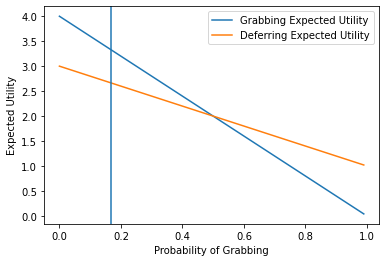

In [19]:
p = np.arange(0,1, step=.01)
eug = p*0 + (1-p)*4
eud = p*1 + (1-p)*3
plt.ticklabel_format(style='plain')
plt.plot(p,eug, label='Grabbing Expected Utility')
plt.plot(p,eud, label='Deferring Expected Utility')
plt.xlabel('Probability of Grabbing')
plt.ylabel('Expected Utility')
plt.legend()
plt.axvline(sum(classdata.column("grabshare")=="Grab")/classdata.num_rows)

Given the class behavior, it would be better to grab